In [ ]:
import pandas as pd

In [2]:
import numpy as np
import datetime

In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [160903, 160910, 160917]
turnstiles_df = get_data(week_nums)

In [4]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580895 entries, 0 to 192877
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   580895 non-null  object
 1   UNIT                                                                  580895 non-null  object
 2   SCP                                                                   580895 non-null  object
 3   STATION                                                               580895 non-null  object
 4   LINENAME                                                              580895 non-null  object
 5   DIVISION                                                              580895 non-null  object
 6   DATE                                                                  580895 non-null  objec

In [5]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214


In [6]:
from datetime import datetime as dt
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [7]:
turnstiles_df['Day_Week'] = turnstiles_df["DATE_TIME"].dt.day_name()

In [8]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00,Saturday


In [9]:
turnstiles_df.sort_values(by=['STATION','UNIT','SCP','DATE','TIME'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week
29649,H007,R248,00-00-00,1 AV,L,BMT,08/27/2016,00:00:00,REGULAR,11448160,12524556,2016-08-27 00:00:00,Saturday
29650,H007,R248,00-00-00,1 AV,L,BMT,08/27/2016,04:00:00,REGULAR,11448263,12524848,2016-08-27 04:00:00,Saturday
29651,H007,R248,00-00-00,1 AV,L,BMT,08/27/2016,08:00:00,REGULAR,11448362,12525150,2016-08-27 08:00:00,Saturday
29652,H007,R248,00-00-00,1 AV,L,BMT,08/27/2016,16:00:00,REGULAR,11449527,12526744,2016-08-27 16:00:00,Saturday
29653,H007,R248,00-00-00,1 AV,L,BMT,08/27/2016,20:00:00,REGULAR,11450095,12527835,2016-08-27 20:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168842,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/16/2016,05:00:00,REGULAR,39,39,2016-09-16 05:00:00,Friday
168843,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/16/2016,09:00:00,REGULAR,39,39,2016-09-16 09:00:00,Friday
168844,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/16/2016,13:00:00,REGULAR,39,39,2016-09-16 13:00:00,Friday
168845,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/16/2016,17:00:00,REGULAR,39,39,2016-09-16 17:00:00,Friday


In [10]:
turnstiles_df["entry change"]=turnstiles_df.ENTRIES.diff()

In [11]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00,Saturday,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00,Saturday,21.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00,Saturday,29.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00,Saturday,118.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00,Saturday,223.0


In [12]:
turnstiles_df = turnstiles_df.rename(columns = {'EXITS                                                               ': 'EXITS'})

In [13]:
turnstiles_df["exit change"]=turnstiles_df.EXITS.diff()

In [14]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
0,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,00:00:00,REGULAR,5799442,1966041,2016-08-27 00:00:00,Saturday,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,04:00:00,REGULAR,5799463,1966044,2016-08-27 04:00:00,Saturday,21.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,08:00:00,REGULAR,5799492,1966079,2016-08-27 08:00:00,Saturday,29.0,35.0
3,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,12:00:00,REGULAR,5799610,1966155,2016-08-27 12:00:00,Saturday,118.0,76.0
4,A002,R051,02-00-00,59 ST,NQR456,BMT,08/27/2016,16:00:00,REGULAR,5799833,1966214,2016-08-27 16:00:00,Saturday,223.0,59.0


In [15]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
192873,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,05:00:00,REGULAR,5554,271,2016-09-16 05:00:00,Friday,0.0,0.0
192874,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,09:00:00,REGULAR,5554,271,2016-09-16 09:00:00,Friday,0.0,0.0
192875,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,13:00:00,REGULAR,5554,271,2016-09-16 13:00:00,Friday,0.0,0.0
192876,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,17:00:00,REGULAR,5554,271,2016-09-16 17:00:00,Friday,0.0,0.0
192877,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/16/2016,21:00:00,REGULAR,5554,271,2016-09-16 21:00:00,Friday,0.0,0.0


In [16]:
(turnstiles_df
 .groupby(["UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,UNIT,SCP,STATION,DATE_TIME,ENTRIES
406643,R276,00-00-01,VERNON-JACKSON,2016-09-16 08:00:00,2
0,R001,00-00-00,WHITEHALL S-FRY,2016-08-27 01:00:00,1
387266,R256,00-06-00,NASSAU ST,2016-09-13 12:00:00,1
387261,R256,00-06-00,NASSAU ST,2016-09-12 16:00:00,1
387262,R256,00-06-00,NASSAU ST,2016-09-12 20:00:00,1


In [17]:
mask = ((turnstiles_df["C/A"] == "N333A") & 
(turnstiles_df["UNIT"] == "R141") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "FOREST HILLS 71") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
82989,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,09/16/2016,01:00:00,REGULAR,1122544,2090889,2016-09-16 01:00:00,Friday,26.0,67.0
82990,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,09/16/2016,05:00:00,REGULAR,1122549,2090895,2016-09-16 05:00:00,Friday,5.0,6.0
82991,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,09/16/2016,09:00:00,REGULAR,1122616,2090970,2016-09-16 09:00:00,Friday,67.0,75.0
82992,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,09/16/2016,13:00:00,REGULAR,1122677,2091088,2016-09-16 13:00:00,Friday,61.0,118.0
82993,N333A,R141,00-00-00,FOREST HILLS 71,EFMR,IND,09/16/2016,17:00:00,REGULAR,1122745,2091330,2016-09-16 17:00:00,Friday,68.0,242.0


In [18]:
turnstiles_df.DESC.value_counts()

REGULAR       579109
RECOVR AUD      1786
Name: DESC, dtype: int64

In [19]:
AUDmask = ((turnstiles_df["DESC"] == "RECOVR AUD") & 
           (turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 12).date()))
turnstiles_df[AUDmask].head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change
37351,J021,R434,00-00-00,VAN SICLEN AV,JZ,BMT,09/12/2016,05:00:00,RECOVR AUD,2238772,2001850,2016-09-12 05:00:00,Monday,26.0,14.0
37393,J021,R434,00-00-01,VAN SICLEN AV,JZ,BMT,09/12/2016,05:00:00,RECOVR AUD,4634399,5670007,2016-09-12 05:00:00,Monday,18.0,35.0
37435,J021,R434,00-00-02,VAN SICLEN AV,JZ,BMT,09/12/2016,05:00:00,RECOVR AUD,5973942,4921903,2016-09-12 05:00:00,Monday,41.0,44.0
57911,N095A,R014,01-00-00,FULTON ST,2345ACJZ,IND,09/12/2016,09:27:31,RECOVR AUD,188287,88993,2016-09-12 09:27:31,Monday,63.0,82.0
57956,N095A,R014,01-00-01,FULTON ST,2345ACJZ,IND,09/12/2016,09:27:31,RECOVR AUD,2622263,429948,2016-09-12 09:27:31,Monday,74.0,40.0


In [20]:
turnstiles_df[AUDmask].count()

C/A             31
UNIT            31
SCP             31
STATION         31
LINENAME        31
DIVISION        31
DATE            31
TIME            31
DESC            31
ENTRIES         31
EXITS           31
DATE_TIME       31
Day_Week        31
entry change    31
exit change     31
dtype: int64

In [21]:
turnstiles_df.sort_values(["UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
(turnstiles_df
 .groupby(["UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,R001,00-00-00,WHITEHALL S-FRY,2016-08-27 01:00:00,1
387266,R256,00-06-00,NASSAU ST,2016-09-13 12:00:00,1
387260,R256,00-06-00,NASSAU ST,2016-09-12 12:00:00,1
387261,R256,00-06-00,NASSAU ST,2016-09-12 16:00:00,1
387262,R256,00-06-00,NASSAU ST,2016-09-12 20:00:00,1


In [23]:
turnstiles_df['traffic by diff'] = turnstiles_df['entry change'] + turnstiles_df['exit change']

In [24]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Day_Week,entry change,exit change,traffic by diff
109778,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,09/16/2016,19:58:21,REGULAR,20645,19406,2016-09-16 19:58:21,Friday,31.0,11.0,42.0
109777,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,09/16/2016,15:46:21,REGULAR,20614,19395,2016-09-16 15:46:21,Friday,17.0,9.0,26.0
109776,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,09/16/2016,11:34:21,REGULAR,20597,19386,2016-09-16 11:34:21,Friday,38.0,7.0,45.0
109775,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,09/16/2016,07:22:21,REGULAR,20559,19379,2016-09-16 07:22:21,Friday,6.0,10.0,16.0
109774,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,09/16/2016,03:10:21,REGULAR,20553,19369,2016-09-16 03:10:21,Friday,2.0,8.0,10.0


In [25]:
turnstiles_df.groupby(['STATION','UNIT','SCP', 'DATE'])[['traffic by diff']].sum()

traffic by diff
STATION   UNIT SCP      DATE                       
1 AV      R248 00-00-00 08/27/2016       14271002.0
                        08/28/2016           5644.0
                        08/29/2016           7220.0
                        08/30/2016           7791.0
                        08/31/2016           7670.0
...                                             ...
ZEREGA AV R326 00-05-01 09/12/2016              0.0
                        09/13/2016              0.0
                        09/14/2016              0.0
                        09/15/2016              0.0
                        09/16/2016              0.0

[96002 rows x 1 columns]

In [26]:
turnstiles_df.groupby(['STATION','UNIT','SCP','DATE'])['ENTRIES'].max()

STATION    UNIT  SCP       DATE      
1 AV       R248  00-00-00  08/27/2016    11450095
                           08/28/2016    11451910
                           08/29/2016    11455137
                           08/30/2016    11458724
                           08/31/2016    11462054
                                           ...   
ZEREGA AV  R326  00-05-01  09/12/2016          39
                           09/13/2016          39
                           09/14/2016          39
                           09/15/2016          39
                           09/16/2016          39
Name: ENTRIES, Length: 96002, dtype: int64

In [27]:
DTraffic_max_min = turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['ENTRIES'].max() - turnstiles_df.groupby(['STATION','UNIT', 'SCP','DATE','Day_Week'])['ENTRIES'].min() + turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['EXITS'].max() - turnstiles_df.groupby(['STATION','UNIT','SCP','DATE','Day_Week'])['EXITS'].min()

In [28]:
DTraffic_df =DTraffic_max_min.reset_index()

In [29]:
DTraffic_df.columns

Index(['STATION', 'UNIT', 'SCP', 'DATE', 'Day_Week', 0], dtype='object')

In [30]:
DTraffic_df = DTraffic_df.rename(columns = {0: 'Traffic'})

In [31]:
DTraffic_df.head()

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
0,1 AV,R248,00-00-00,08/27/2016,Saturday,5214
1,1 AV,R248,00-00-00,08/28/2016,Sunday,4461
2,1 AV,R248,00-00-00,08/29/2016,Monday,6319
3,1 AV,R248,00-00-00,08/30/2016,Tuesday,6898
4,1 AV,R248,00-00-00,08/31/2016,Wednesday,6699


In [32]:
DTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(20)

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
66843,HIGH ST,R252,00-00-02,09/16/2016,Friday,3676518592
26472,57 ST-7 AV,R080,01-00-04,09/13/2016,Tuesday,3672093753
50111,CHRISTOPHER ST,R189,01-00-02,09/10/2016,Saturday,1734640927
57007,EUCLID AV,R200,00-00-02,08/28/2016,Sunday,1629936363
83397,PELHAM PKWY,R361,01-05-00,09/05/2016,Monday,117439213
2936,125 ST,R206,01-00-00,09/13/2016,Tuesday,112685711
7788,167 ST,R104,01-05-01,09/15/2016,Thursday,83885676
23280,49 ST,R081,03-06-01,09/13/2016,Tuesday,83565367
83398,PELHAM PKWY,R361,01-05-00,09/06/2016,Tuesday,33554434
57070,EUCLID AV,R200,00-00-05,08/28/2016,Sunday,26850901


In [33]:
DTraffic_df['Traffic'].mask(DTraffic_df['Traffic'].between(10000,3676518593 ), inplace=True)

In [34]:
DTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(20)

,STATION,UNIT,SCP,DATE,Day_Week,Traffic
67448,HOWARD BCH JFK,R535,00-00-03,09/12/2016,Monday,9895.0
34634,86 ST,R179,01-00-09,09/06/2016,Tuesday,9885.0
64459,GRD CNTRL-42 ST,R046,00-00-09,09/09/2016,Friday,9811.0
64437,GRD CNTRL-42 ST,R046,00-00-08,09/08/2016,Thursday,9798.0
92635,W 4 ST-WASH SQ,R138,01-00-00,09/09/2016,Friday,9774.0
64415,GRD CNTRL-42 ST,R046,00-00-07,09/07/2016,Wednesday,9768.0
64451,GRD CNTRL-42 ST,R046,00-00-09,09/01/2016,Thursday,9712.0
64477,GRD CNTRL-42 ST,R046,00-03-00,09/06/2016,Tuesday,9702.0
64469,GRD CNTRL-42 ST,R046,00-03-00,08/29/2016,Monday,9690.0
64457,GRD CNTRL-42 ST,R046,00-00-09,09/07/2016,Wednesday,9689.0


In [35]:
STraffic =DTraffic_df.groupby(['Day_Week','STATION'])['Traffic'].sum()

In [36]:
STraffic_df = STraffic.reset_index()
STraffic_df.head()

,Day_Week,STATION,Traffic
0,Friday,1 AV,117663.0
1,Friday,103 ST,150467.0
2,Friday,103 ST-CORONA,95308.0
3,Friday,104 ST,19625.0
4,Friday,110 ST,59883.0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\96650\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Traffic', ylabel='Density'>

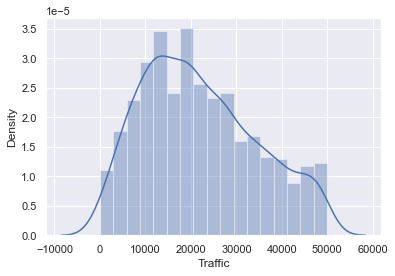

In [40]:
sns.distplot(STraffic_df['Traffic']
             [STraffic_df['Traffic'] < 50000])

<AxesSubplot:xlabel='Day_Week', ylabel='Traffic'>

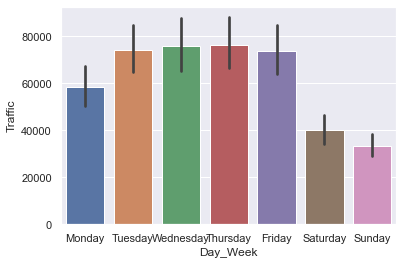

In [44]:
sns.barplot(x = 'Day_Week',y='Traffic',data=STraffic_df,order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [45]:
Wedmask = ((STraffic_df["Day_Week"] == "Wednesday") )
Wedmask.df=STraffic_df[Wedmask].sort_values(by = ["Traffic"], ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, 'GRD CNTRL-42 ST'),
  Text(2, 0, '34 ST-HERALD SQ'),
  Text(3, 0, '23 ST'),
  Text(4, 0, '14 ST-UNION SQ'),
  Text(5, 0, '86 ST'),
  Text(6, 0, 'FULTON ST'),
  Text(7, 0, 'TIMES SQ-42 ST'),
  Text(8, 0, '42 ST-PORT AUTH'),
  Text(9, 0, '59 ST')])

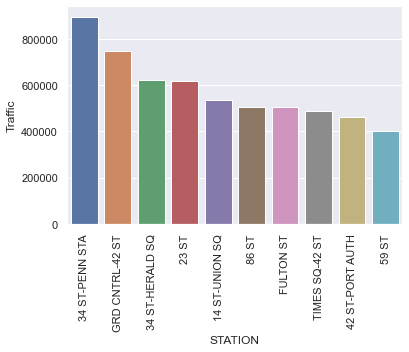

In [46]:
sns.barplot(x = 'STATION',y='Traffic',data=Wedmask.df)
plt.xticks(rotation='vertical')

In [47]:
Satmask = ((STraffic_df["Day_Week"] == "Saturday") )
STraffic_df[Satmask].sort_values(by = ["Traffic"], ascending=False).head(10)

,Day_Week,STATION,Traffic
808,Saturday,34 ST-PENN STA,399038.0
761,Saturday,14 ST-UNION SQ,332317.0
806,Saturday,34 ST-HERALD SQ,318154.0
1095,Saturday,TIMES SQ-42 ST,293344.0
977,Saturday,GRD CNTRL-42 ST,292030.0
815,Saturday,42 ST-PORT AUTH,288808.0
856,Saturday,86 ST,288134.0
756,Saturday,125 ST,249314.0
793,Saturday,23 ST,238563.0
917,Saturday,CANAL ST,227500.0


In [48]:
totalTraffic =DTraffic_df.groupby(['STATION'])['Traffic'].sum()
TotalTraffic_df = totalTraffic.reset_index()
TotalTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(10)

,STATION,Traffic
61,34 ST-PENN STA,4947748.0
230,GRD CNTRL-42 ST,3960290.0
59,34 ST-HERALD SQ,3524088.0
46,23 ST,3260070.0
14,14 ST-UNION SQ,3144760.0
109,86 ST,2938572.0
349,TIMES SQ-42 ST,2848777.0
223,FULTON ST,2795361.0
68,42 ST-PORT AUTH,2734854.0
9,125 ST,2325036.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, 'GRD CNTRL-42 ST'),
  Text(2, 0, '34 ST-HERALD SQ'),
  Text(3, 0, '23 ST'),
  Text(4, 0, '14 ST-UNION SQ'),
  Text(5, 0, '86 ST'),
  Text(6, 0, 'TIMES SQ-42 ST'),
  Text(7, 0, 'FULTON ST'),
  Text(8, 0, '42 ST-PORT AUTH'),
  Text(9, 0, '125 ST')])

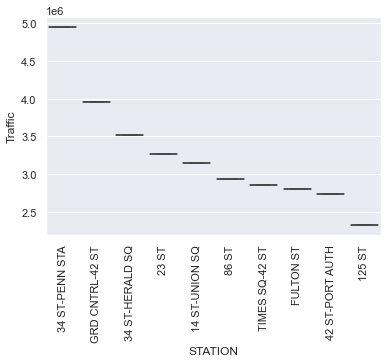

In [49]:
sns.boxplot(x ="STATION", y="Traffic",data=TotalTraffic_df.sort_values(by = ["Traffic"], ascending=False).head(10));
plt.xticks(rotation='vertical')